In [1]:
import seaborn as sns
import polars as pl
import polars.selectors as cs
import matplotlib.pyplot as plt

## Saratoga NY Home Prices Data Set

In [3]:
(homes :=
 pl.read_csv("./data/Saratoga_NY_Homes.csv")
)

shape: (1_728, 17)
┌────────┬──────────┬────────────┬─────┬───┬────────────┬───────────┬───────┬─────────────┐
│ Price  ┆ Lot.Size ┆ Waterfront ┆ Age ┆ … ┆ Fireplaces ┆ Bathrooms ┆ Rooms ┆ Fireplaces? │
│ ---    ┆ ---      ┆ ---        ┆ --- ┆   ┆ ---        ┆ ---       ┆ ---   ┆ ---         │
│ i64    ┆ f64      ┆ i64        ┆ i64 ┆   ┆ i64        ┆ f64       ┆ i64   ┆ i64         │
╞════════╪══════════╪════════════╪═════╪═══╪════════════╪═══════════╪═══════╪═════════════╡
│ 132500 ┆ 0.09     ┆ 0          ┆ 42  ┆ … ┆ 1          ┆ 1.0       ┆ 5     ┆ 1           │
│ 181115 ┆ 0.92     ┆ 0          ┆ 0   ┆ … ┆ 0          ┆ 2.5       ┆ 6     ┆ 0           │
│ 109000 ┆ 0.19     ┆ 0          ┆ 133 ┆ … ┆ 1          ┆ 1.0       ┆ 8     ┆ 1           │
│ 155000 ┆ 0.41     ┆ 0          ┆ 13  ┆ … ┆ 1          ┆ 1.5       ┆ 5     ┆ 1           │
│ 86060  ┆ 0.11     ┆ 0          ┆ 0   ┆ … ┆ 0          ┆ 1.0       ┆ 3     ┆ 0           │
│ …      ┆ …        ┆ …          ┆ …   ┆ … ┆ …          ┆ …         ┆ …     ┆ …           │
│ 289000 ┆ 0.38     ┆ 0          ┆ 32  ┆ … ┆ 1          ┆ 2.5       ┆ 11    ┆ 1           │
│ 285000 ┆ 0.94     ┆ 0          ┆ 37  ┆ … ┆ 1          ┆ 2.5       ┆ 11    ┆ 1           │
│ 194900 ┆ 0.39     ┆ 0          ┆ 9   ┆ … ┆ 0          ┆ 1.0       ┆ 3     ┆ 0           │
│ 125000 ┆ 0.24     ┆ 0          ┆ 48  ┆ … ┆ 1          ┆ 1.0       ┆ 7     ┆ 1           │
│ 111300 ┆ 0.59     ┆ 0          ┆ 86  ┆ … ┆ 0          ┆ 1.0       ┆ 6     ┆ 0           │
└────────┴──────────┴────────────┴─────┴───┴────────────┴───────────┴───────┴─────────────┘

In [4]:
homes.columns

['Price',
 'Lot.Size',
 'Waterfront',
 'Age',
 'Land.Value',
 'New.Construct',
 'Central.Air',
 'Fuel.Type',
 'Heat.Type',
 'Sewer.Type',
 'Living.Area',
 'Pct.College',
 'Bedrooms',
 'Fireplaces',
 'Bathrooms',
 'Rooms',
 'Fireplaces?']

### Cleaning Data

In [11]:
cat_cols = ['Waterfront','New.Construct','Central.Air','Fireplaces?']
cat_cols2 = ['Fuel.Type','Heat.Type','Sewer.Type']

(homes_fixed :=
 homes
 .with_columns(pl.col(cat_cols).replace_strict({1:'yes', 0:'no'}))
 .with_columns(pl.col(cat_cols2).cast(pl.Utf8))
)

shape: (1_728, 17)
┌────────┬──────────┬────────────┬─────┬───┬────────────┬───────────┬───────┬─────────────┐
│ Price  ┆ Lot.Size ┆ Waterfront ┆ Age ┆ … ┆ Fireplaces ┆ Bathrooms ┆ Rooms ┆ Fireplaces? │
│ ---    ┆ ---      ┆ ---        ┆ --- ┆   ┆ ---        ┆ ---       ┆ ---   ┆ ---         │
│ i64    ┆ f64      ┆ str        ┆ i64 ┆   ┆ i64        ┆ f64       ┆ i64   ┆ str         │
╞════════╪══════════╪════════════╪═════╪═══╪════════════╪═══════════╪═══════╪═════════════╡
│ 132500 ┆ 0.09     ┆ no         ┆ 42  ┆ … ┆ 1          ┆ 1.0       ┆ 5     ┆ yes         │
│ 181115 ┆ 0.92     ┆ no         ┆ 0   ┆ … ┆ 0          ┆ 2.5       ┆ 6     ┆ no          │
│ 109000 ┆ 0.19     ┆ no         ┆ 133 ┆ … ┆ 1          ┆ 1.0       ┆ 8     ┆ yes         │
│ 155000 ┆ 0.41     ┆ no         ┆ 13  ┆ … ┆ 1          ┆ 1.5       ┆ 5     ┆ yes         │
│ 86060  ┆ 0.11     ┆ no         ┆ 0   ┆ … ┆ 0          ┆ 1.0       ┆ 3     ┆ no          │
│ …      ┆ …        ┆ …          ┆ …   ┆ … ┆ …          ┆ …         ┆ …     ┆ …           │
│ 289000 ┆ 0.38     ┆ no         ┆ 32  ┆ … ┆ 1          ┆ 2.5       ┆ 11    ┆ yes         │
│ 285000 ┆ 0.94     ┆ no         ┆ 37  ┆ … ┆ 1          ┆ 2.5       ┆ 11    ┆ yes         │
│ 194900 ┆ 0.39     ┆ no         ┆ 9   ┆ … ┆ 0          ┆ 1.0       ┆ 3     ┆ no          │
│ 125000 ┆ 0.24     ┆ no         ┆ 48  ┆ … ┆ 1          ┆ 1.0       ┆ 7     ┆ yes         │
│ 111300 ┆ 0.59     ┆ no         ┆ 86  ┆ … ┆ 0          ┆ 1.0       ┆ 6     ┆ no          │
└────────┴──────────┴────────────┴─────┴───┴────────────┴───────────┴───────┴─────────────┘

In [12]:
(cat_predictors :=
 homes_fixed
 .select(cs.by_name('Price') | cs.string())
 .unpivot(cs.string(),
          index = 'Price',
          variable_name = 'predictor',
          value_name = 'label')
 .to_pandas()
)

Price    predictor label
0      132500   Waterfront    no
1      181115   Waterfront    no
2      109000   Waterfront    no
3      155000   Waterfront    no
4       86060   Waterfront    no
...       ...          ...   ...
12091  289000  Fireplaces?   yes
12092  285000  Fireplaces?   yes
12093  194900  Fireplaces?    no
12094  125000  Fireplaces?   yes
12095  111300  Fireplaces?    no

[12096 rows x 3 columns]

### Categorical Data

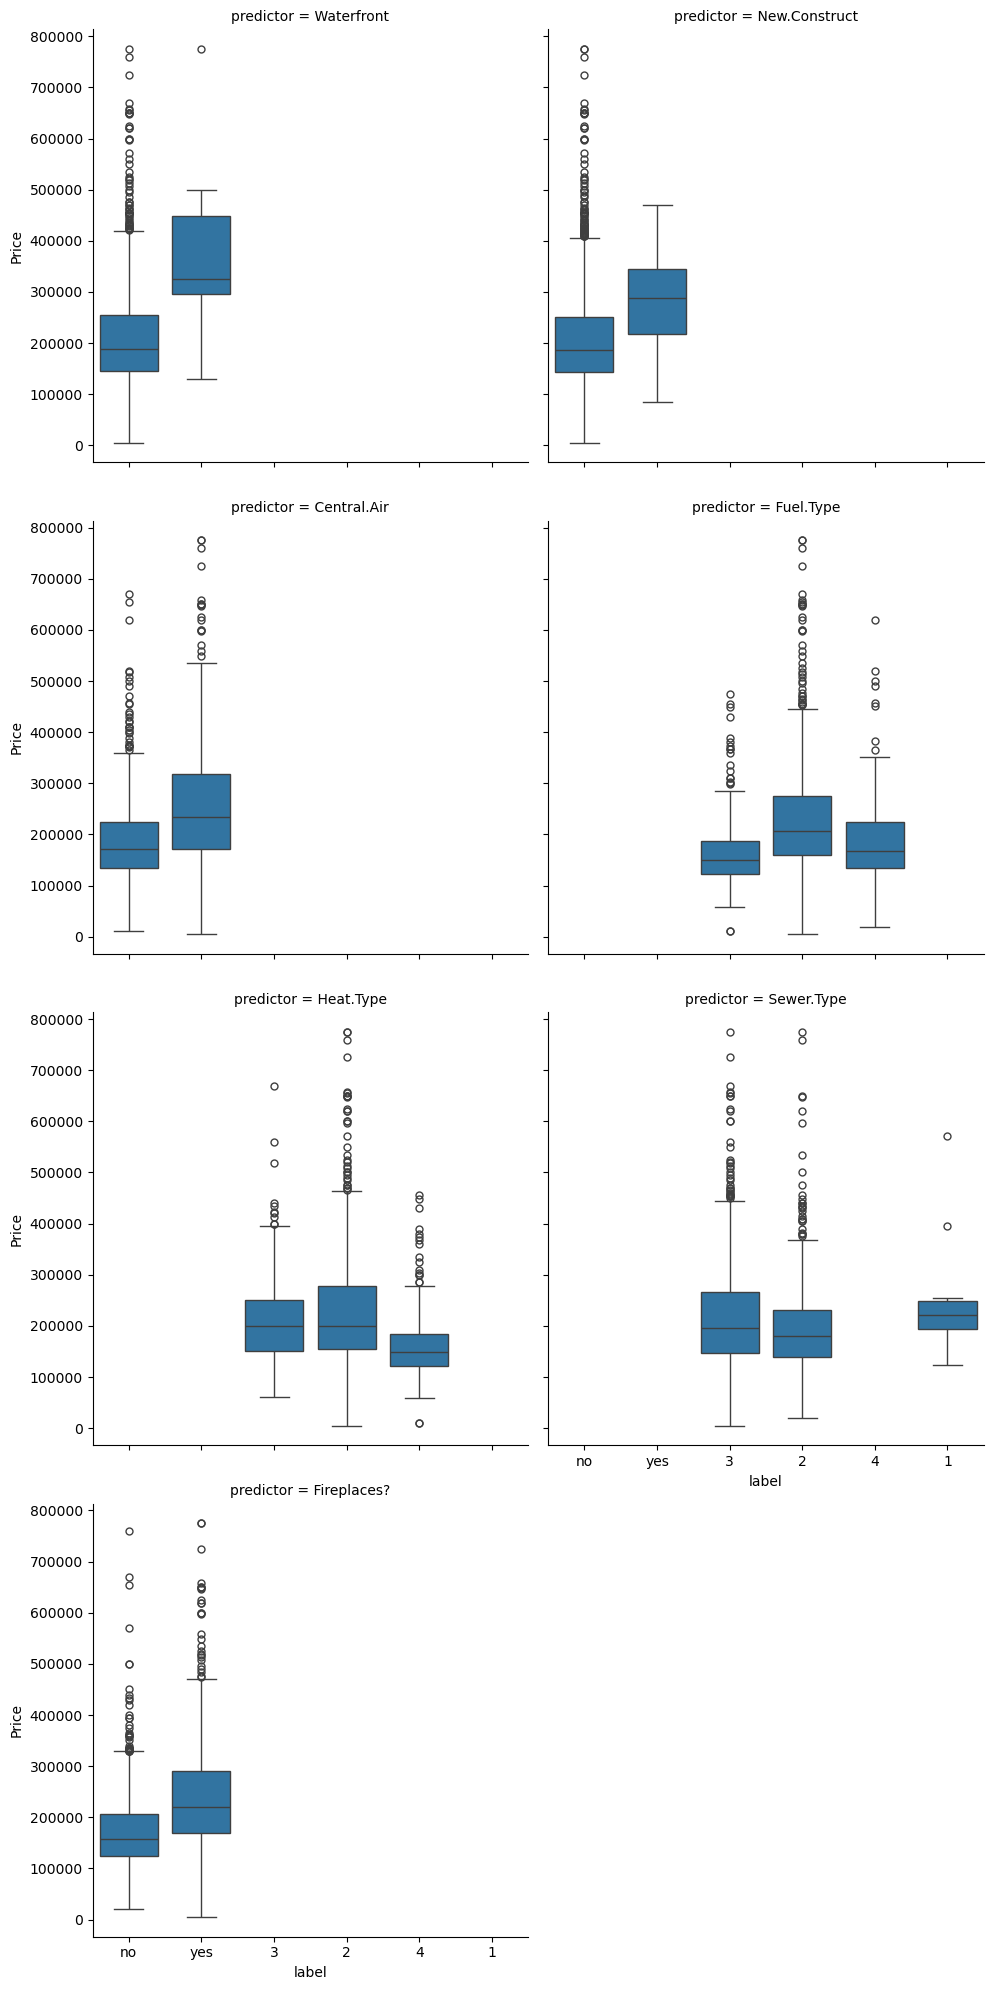

In [13]:
sns.catplot(
    data=cat_predictors, x='label', y='Price',
    col='predictor', kind='box', col_wrap=2
)

### Summary For Categorical Varibales

A house in Saratoga typically would have a higher home value if they house was a new construction that was on a water front with central air, and a fire place than those houses that did not have these options. Fuel type, heat type, and sewer types did not display much change with home value indicating that there is not much change in home value based on these features.

## Numeric Predictors

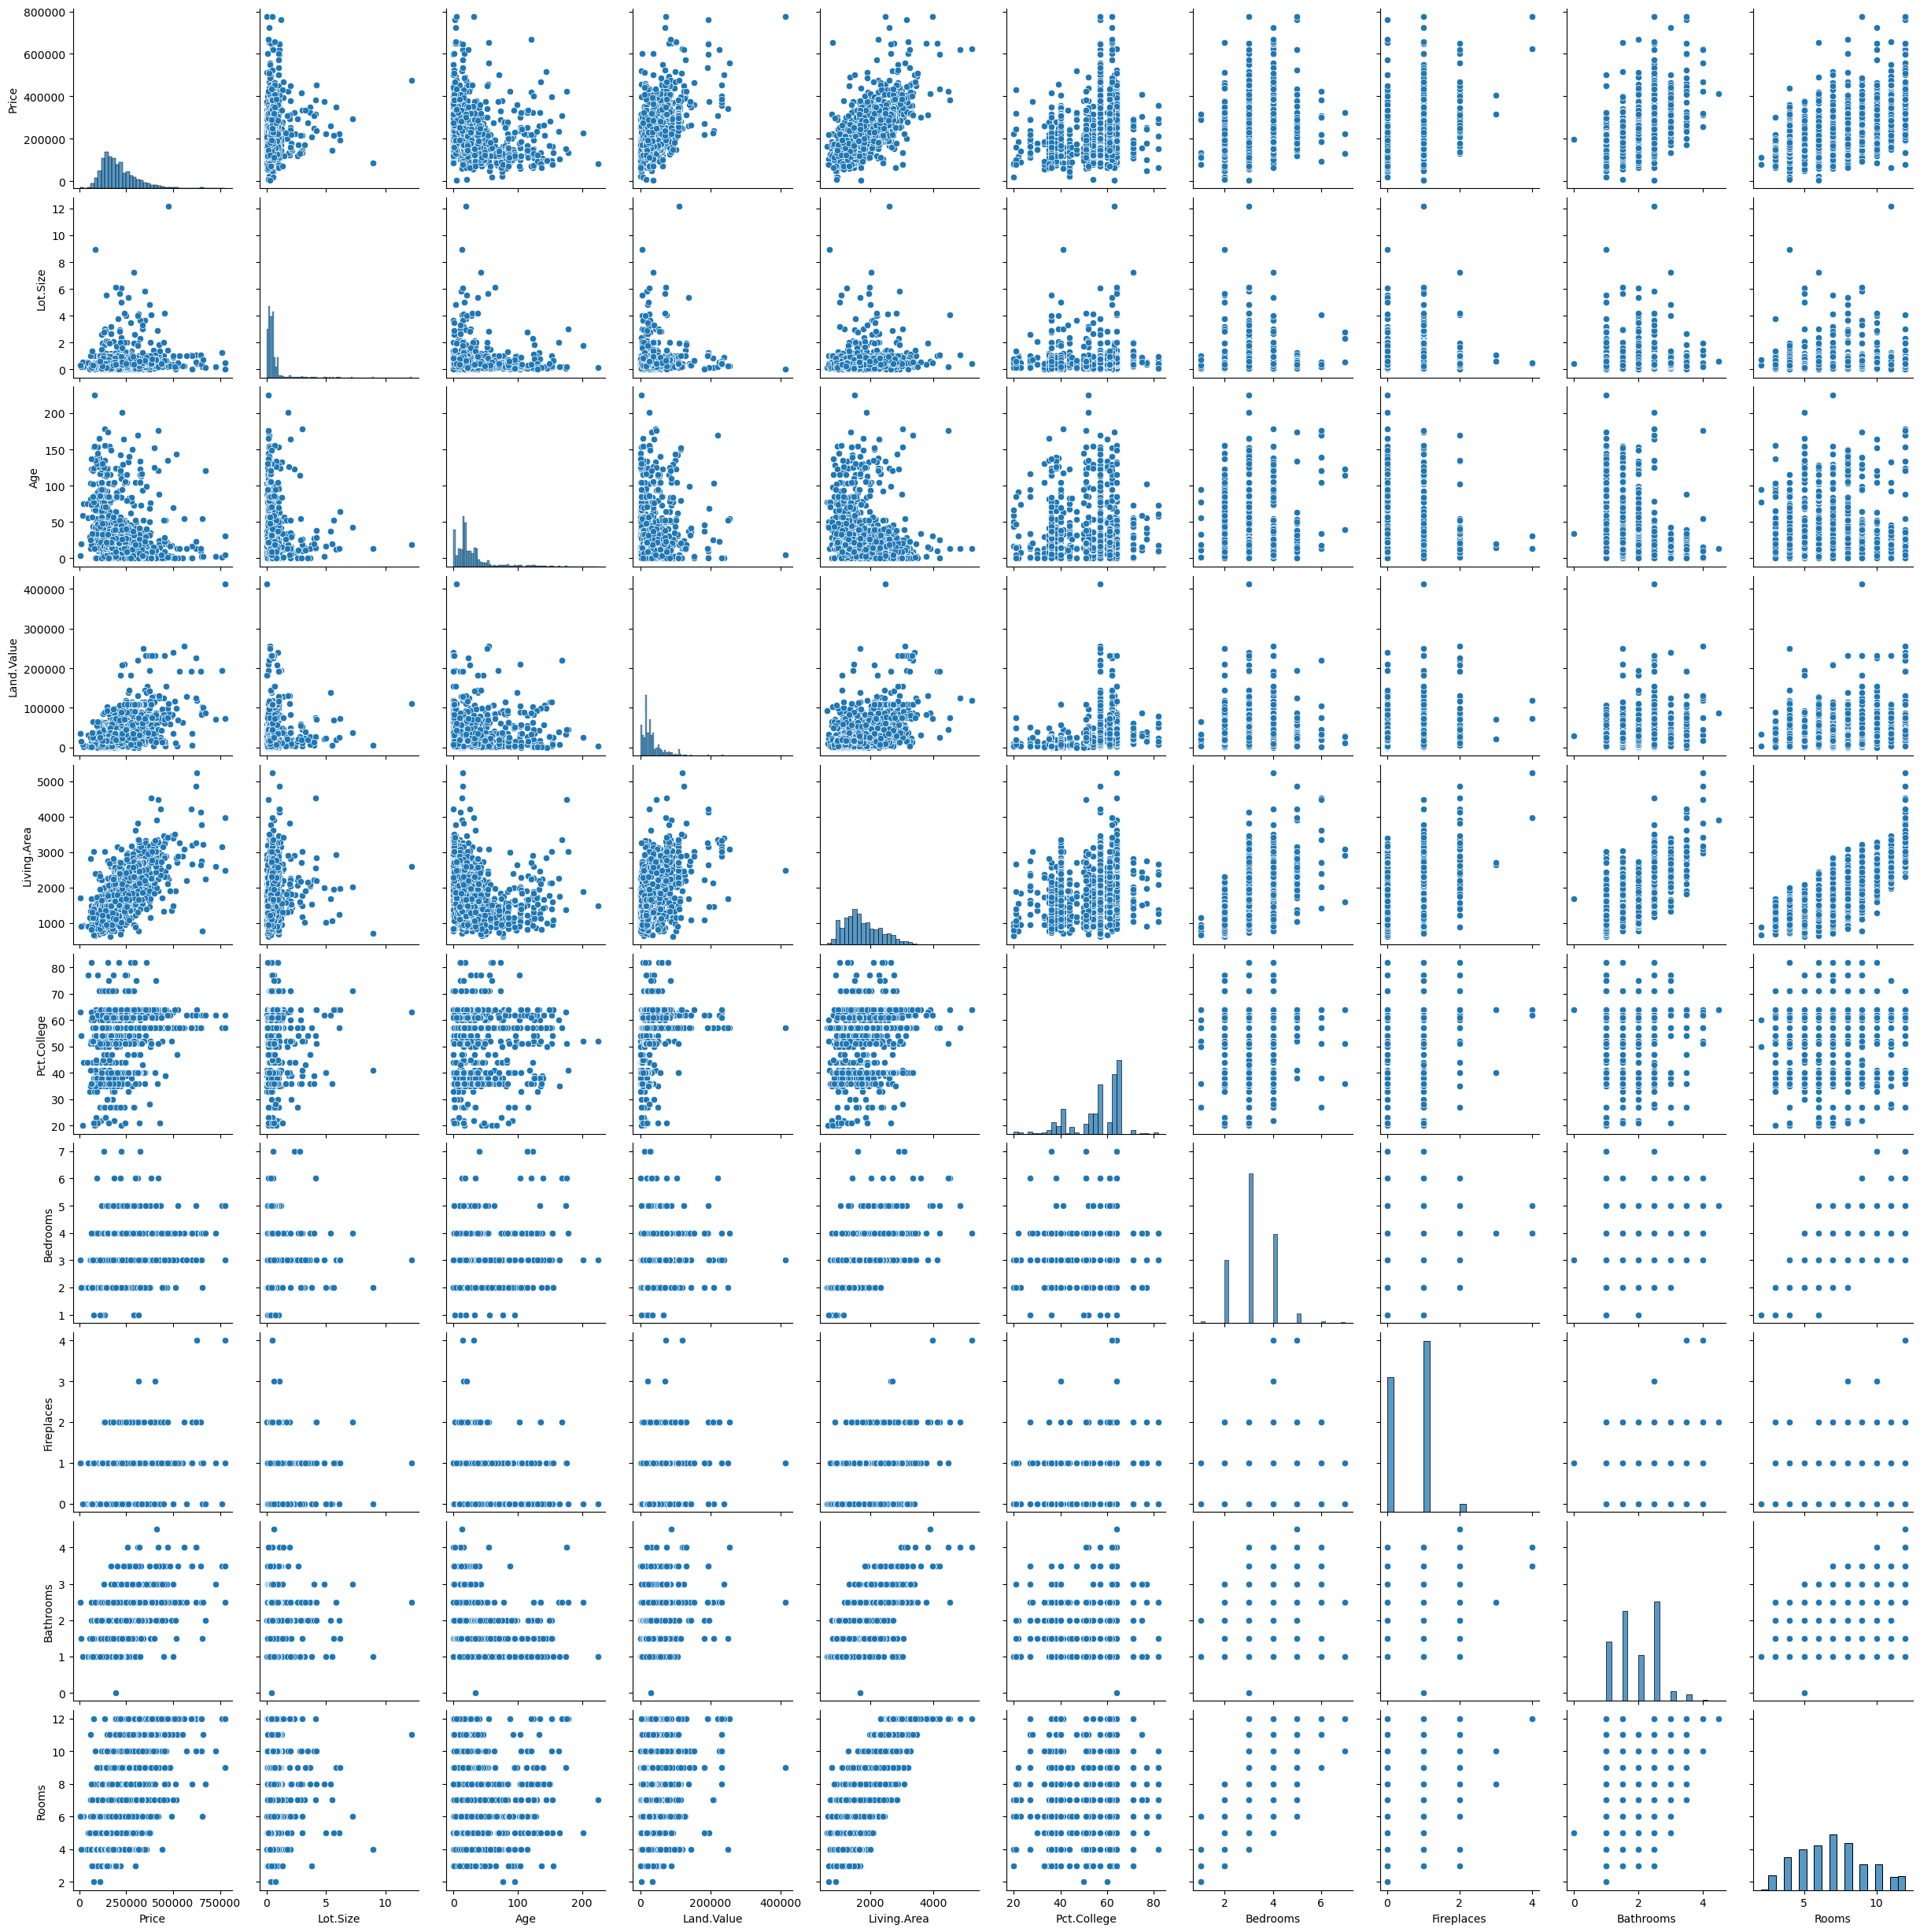

In [14]:
sns.pairplot(homes_fixed.to_pandas())


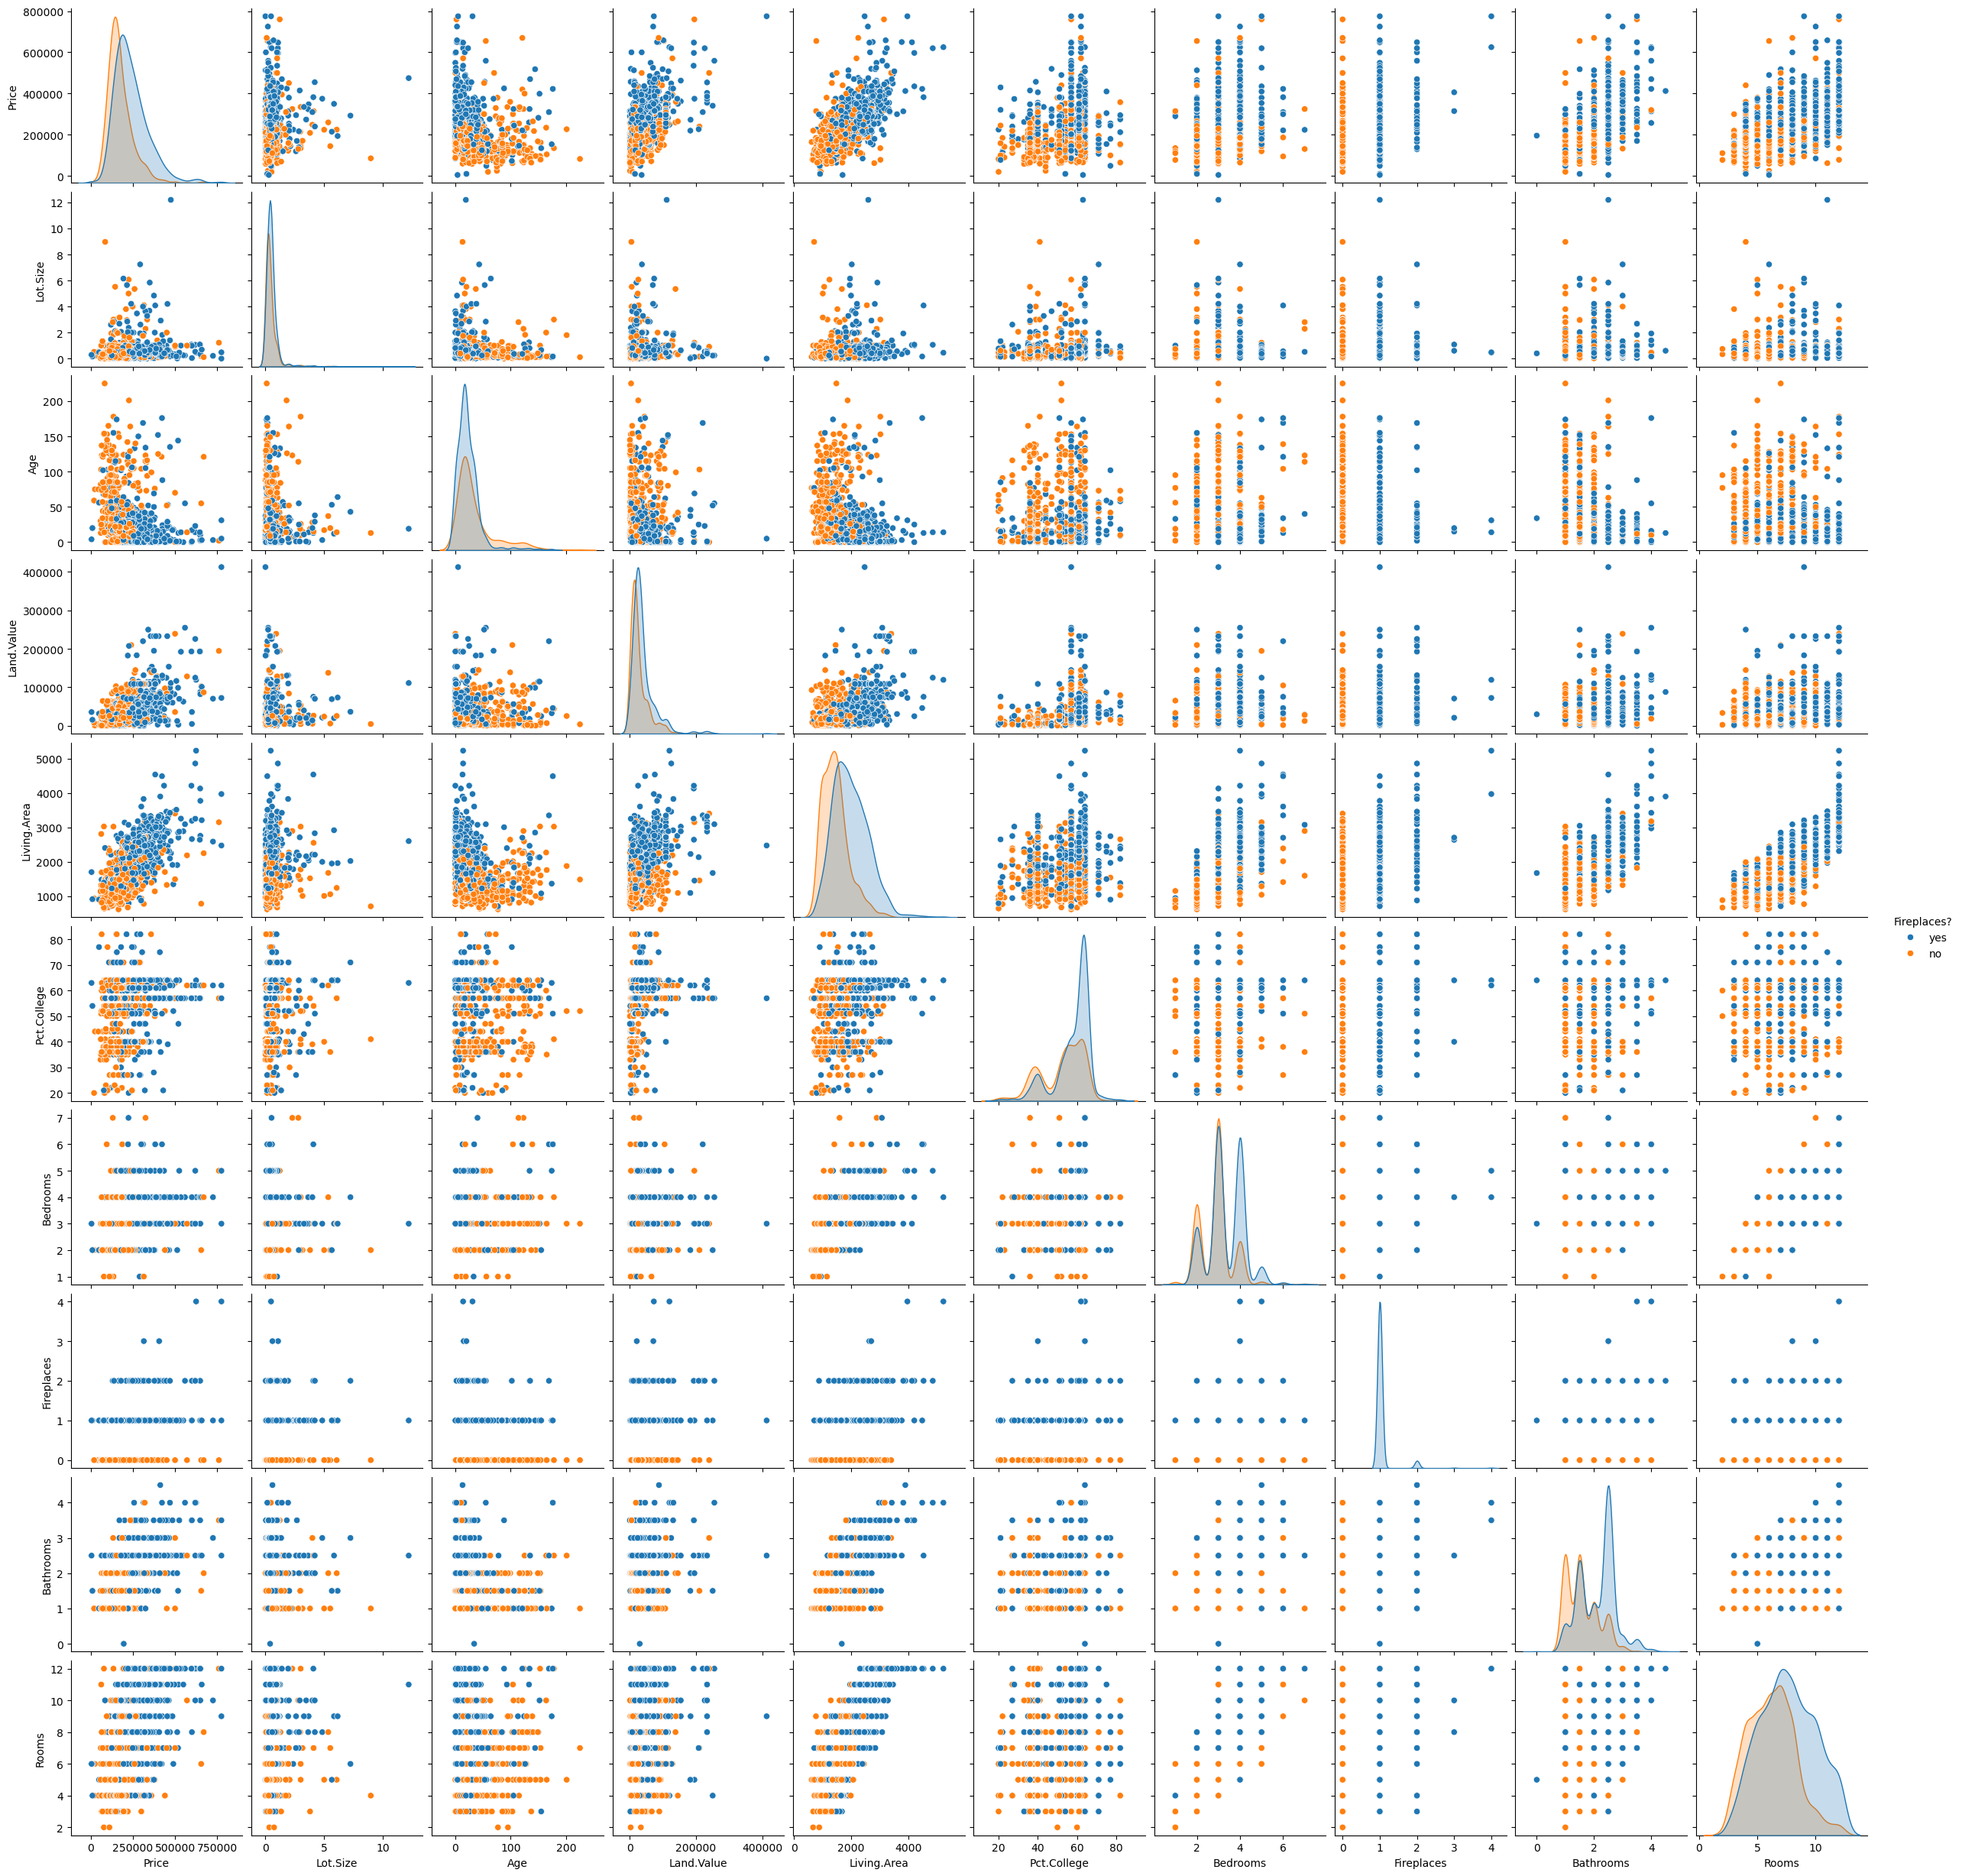

In [15]:
sns.pairplot(homes_fixed.to_pandas(), hue='Fireplaces?')

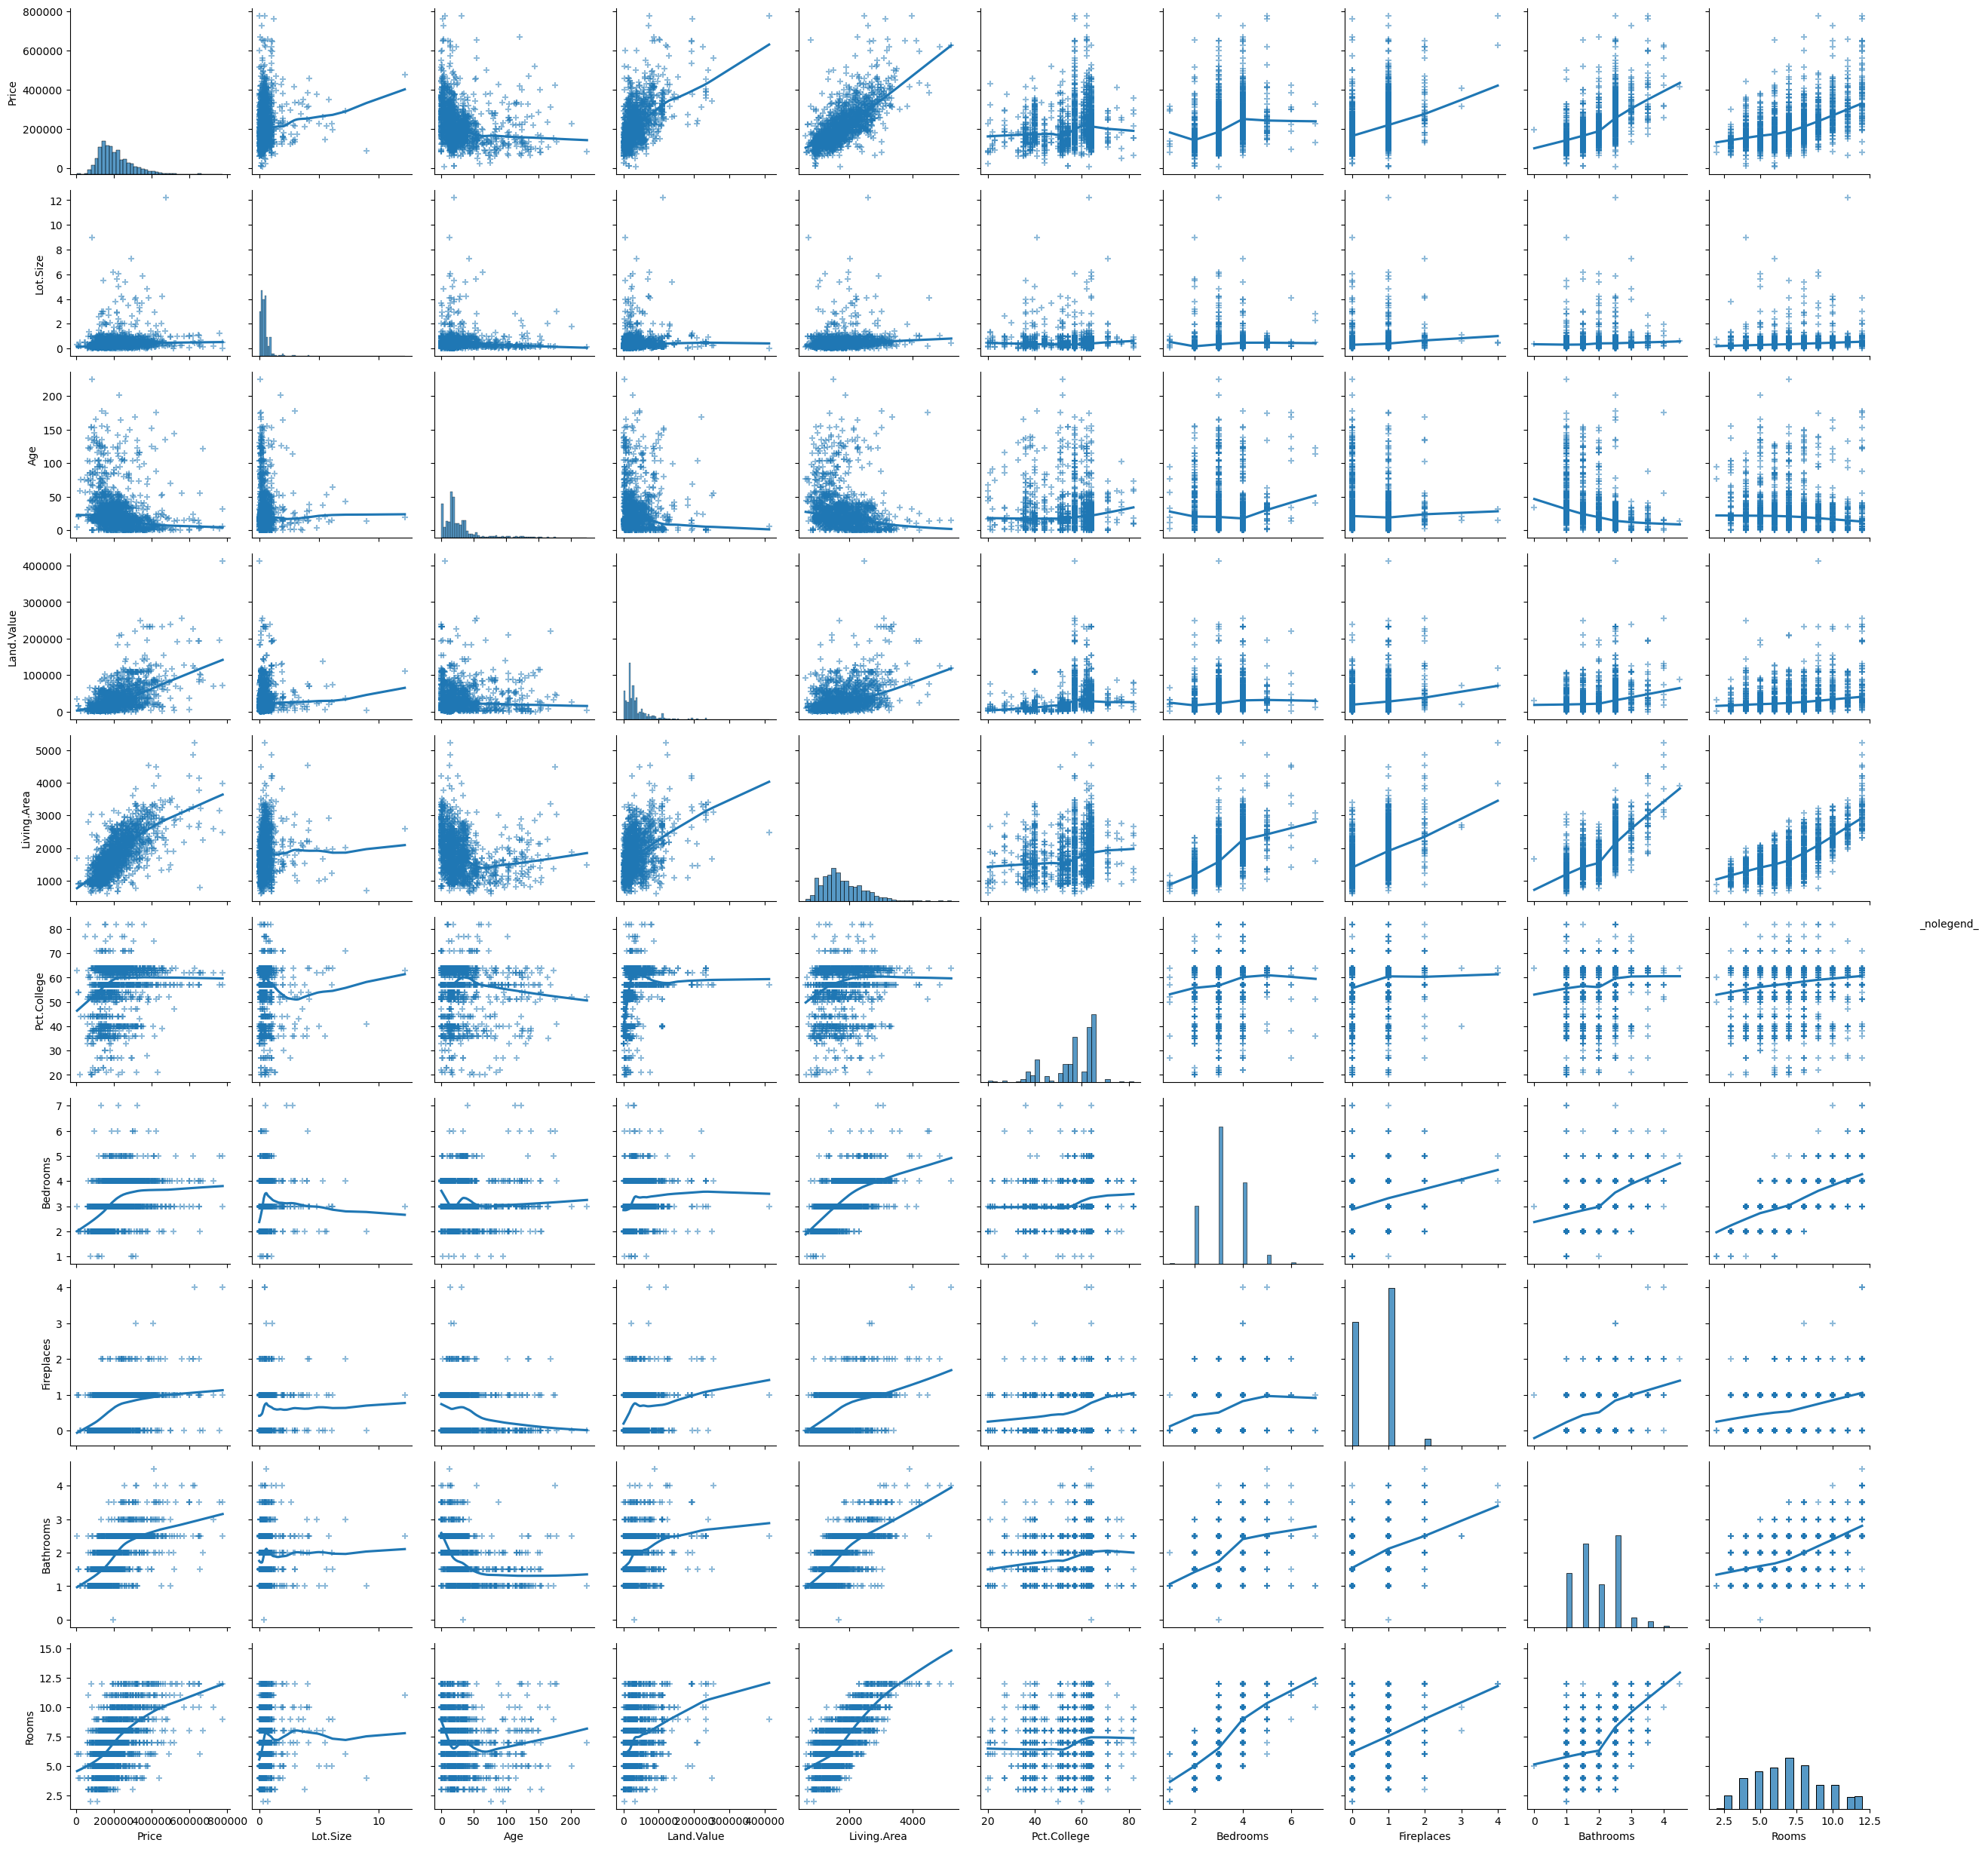

In [18]:
g = sns.PairGrid(homes_fixed.to_pandas())
g.map_diag(sns.histplot)
g.map_offdiag(sns.regplot,
              lowess=True,
              marker="+",
              scatter_kws={'alpha': 0.5}
              )
g.add_legend()

c:\Users\is7316xu\AppData\Local\anaconda3\envs\polars\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=vector, **plot_kwargs)
c:\Users\is7316xu\AppData\Local\anaconda3\envs\polars\Lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
c:\Users\is7316xu\AppData\Local\anaconda3\envs\polars\Lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
c:\Users\is7316xu\AppData\Local\anaconda3\envs\polars\Lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
c:\Users\is7316xu\AppData\Local\anaconda3\envs\polars\Lib\site-packages\statsmodels\nonparamet

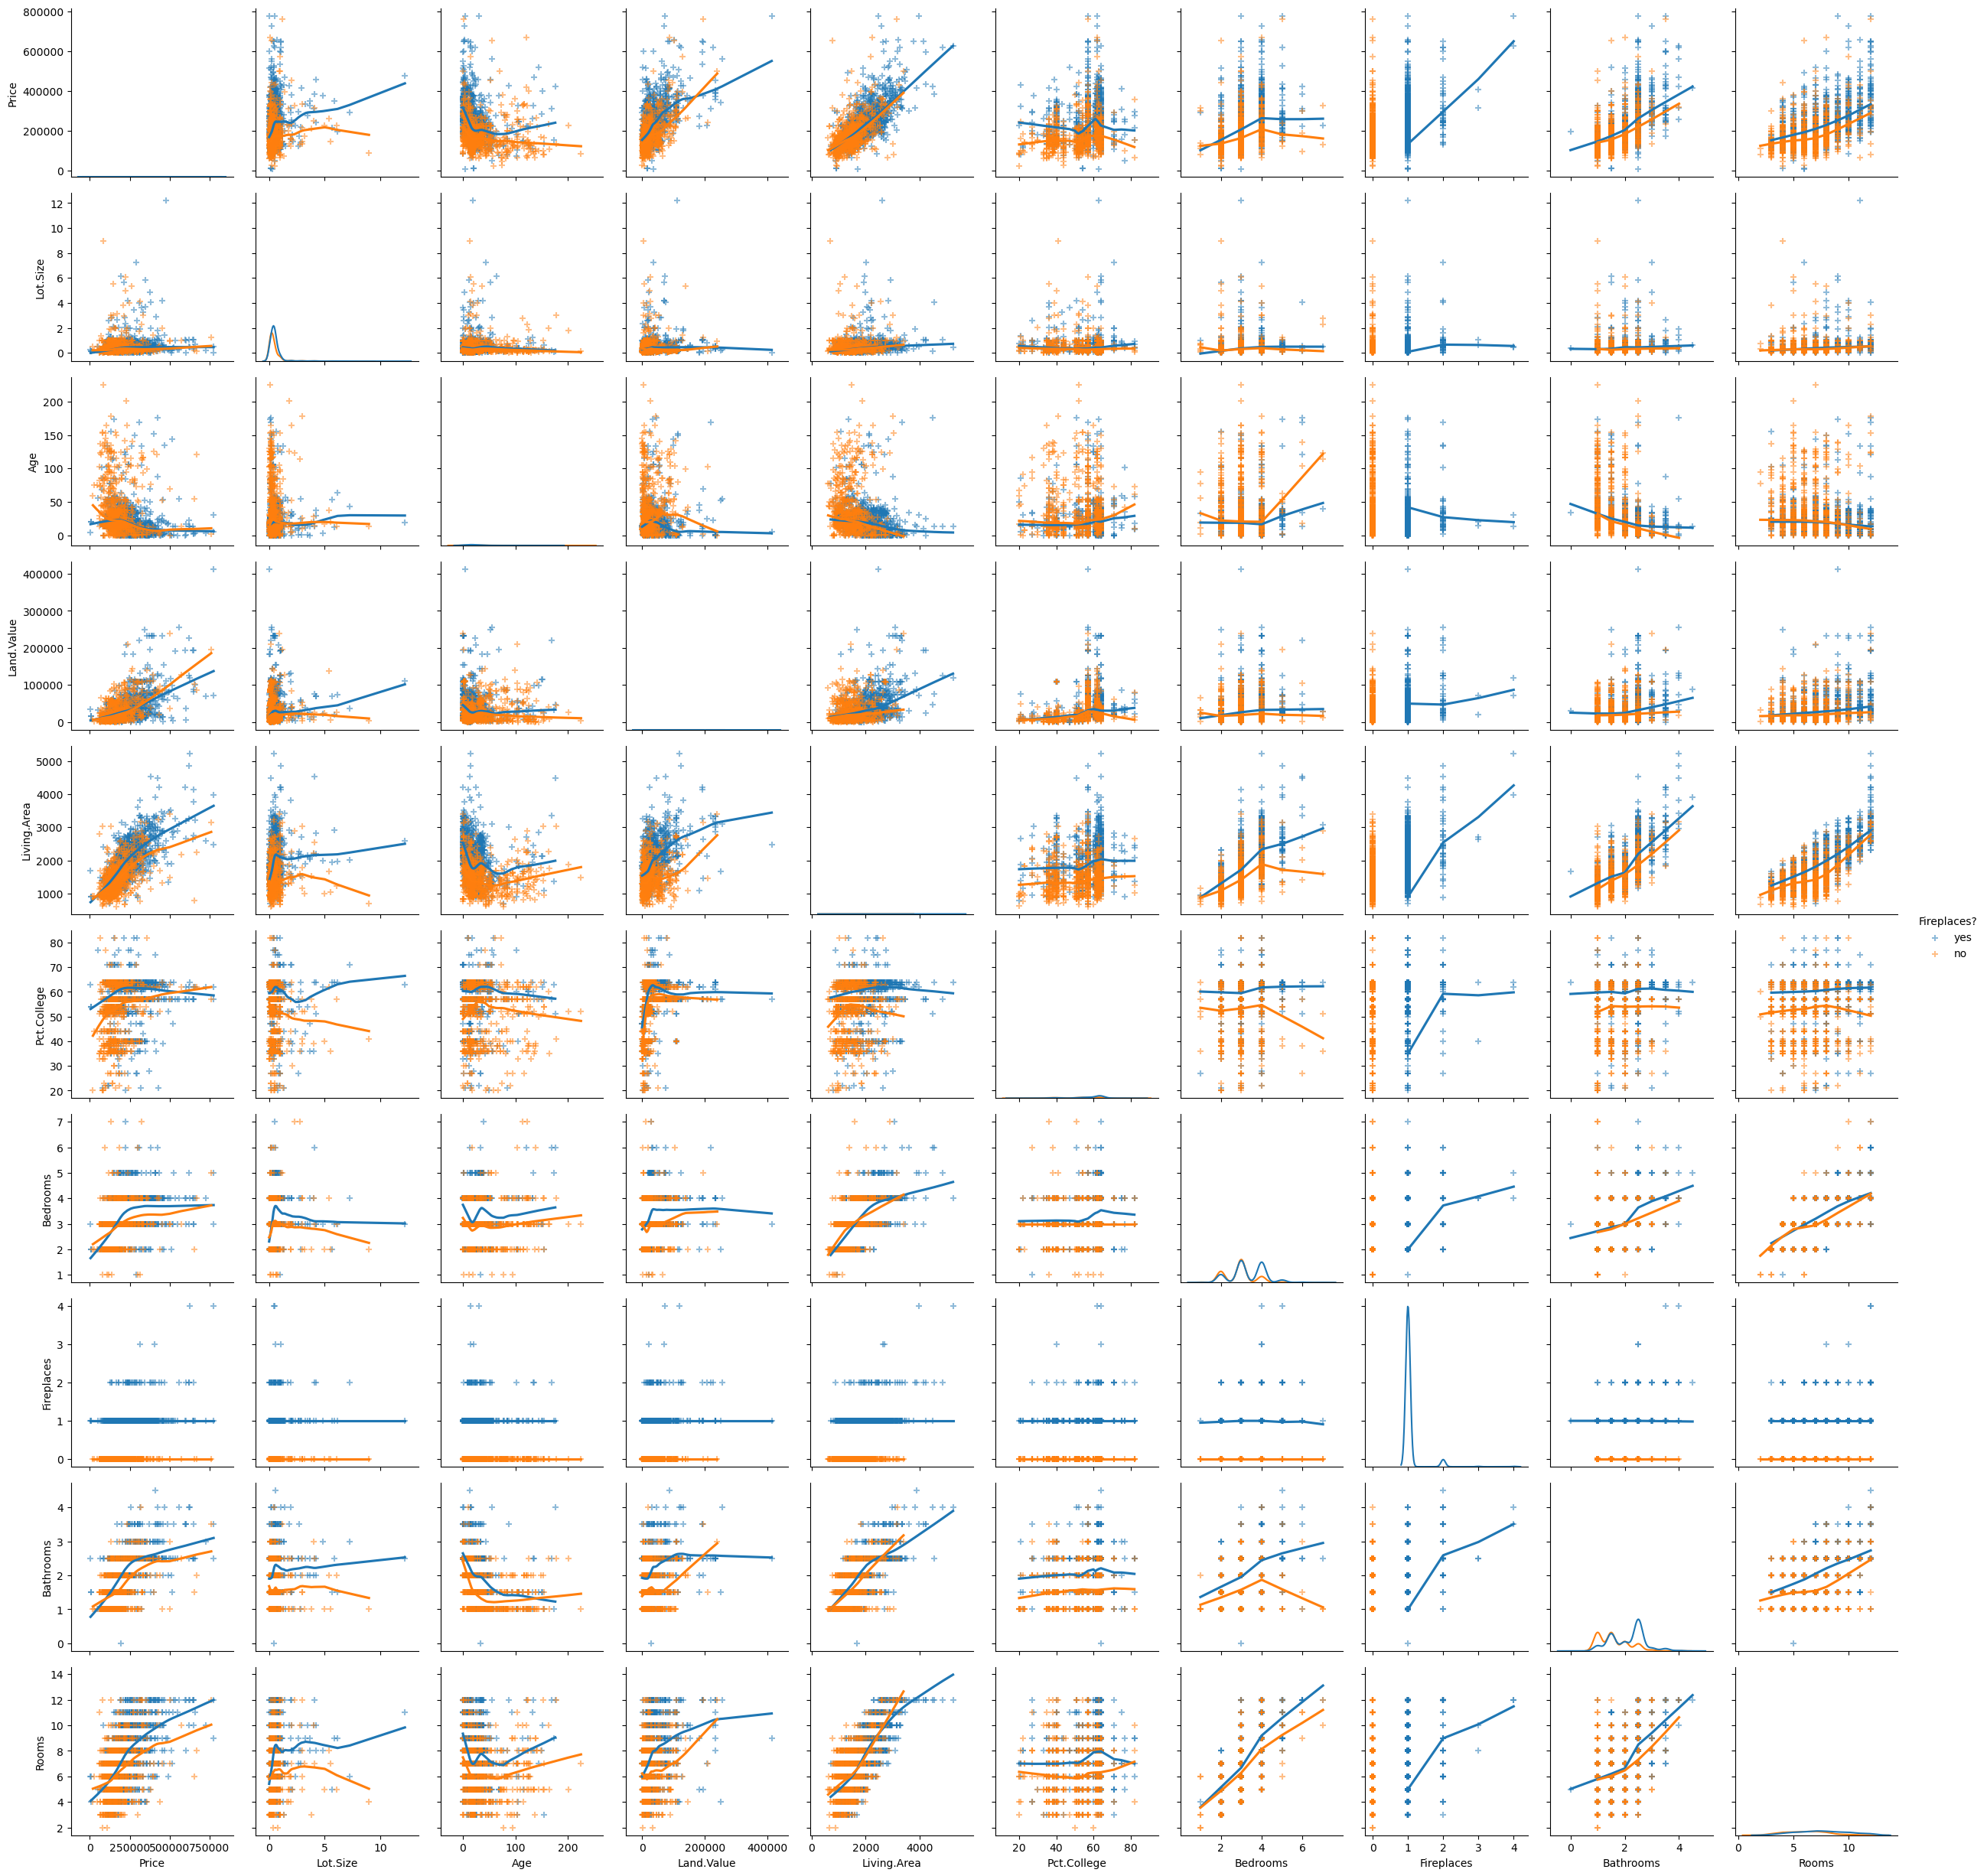

In [20]:
g = sns.PairGrid(homes_fixed.to_pandas(), hue='Fireplaces?')
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.regplot,
              lowess=True,
              marker="+",
              scatter_kws={'alpha': 0.5}
              )
g.add_legend()

## Summary for Numeric Predictors

Looking at all the visuals for predicting house prices based on the numeric predictors we can see that lot size, land value, and living area are the predictors with the strongest positive correlation with home price. Fireplaces, bathrooms, and rooms have a moderate positive correlation with home price indicating that as the larger these variables get the more expenses we can expect the home price to be. Age, percent college, and bedrooms have a almost no correlation with home value. When adding the fireplace varible, we can see that most homes that did have a fire place also tended to have larger amounts of the numeric predictors. 